# Introduction to Portfolio Construction and Analysis with Python
EDHEC Business School  
https://www.coursera.org/learn/introduction-portfolio-construction-python


## Random Walk Generation

The stochastic model for asset returns of stock is given by the Geometric Brownian Motion process:

$$ \frac{S_{t+dt}-S_t}{S_t} = \mu dt + \sigma\sqrt{dt}\xi_t $$  
$$ \mu = r_{f} + \sigma\lambda $$  
$$ \sqrt{dt}\xi_t = dW_{t} $$

$\mu$ is the expected return on the risky asset and is also the risk-free rate ($r_{f}$) plus the risk premium.  The risk premium ($\sigma\lambda$) is given by number of unit of risk which is volatility $\sigma$ times the unit price of the unity one per unit of risk which is $\lambda$, the Sharpe Ratio.

GBM follows a normal distribution with zero meand and variance.  $\mu$ is the annualised expected return and $\sigma$ is the annualised volatilty.

Parameters like interest rates and volatility are stochastic process that varies over time.  The equations below are called mean reverting processes, because they reflect the fact that in the real-world, interest rates volatility and Sharpe ratios tend to be positive.

$$ dr_{t} = a(b-r_{t}) + \sigma_{r}dW_{t}^{r} $$   
$$ dV_{t} = \alpha(\bar{V}-V_{t}) + \sigma_{V}\sqrt{V_{t}}dW_{t}^{V} $$ 

Note that:
$$ \sqrt{V_{t}} = \sigma_{s} $$

In [43]:
import sys  
sys.path.append('../src') 
from edhec_risk_kit import *

import numpy as np
import pandas as pd
import edhec_risk_kit as erk
import matplotlib.pyplot as plt

DATA_FOLDER = '../data/'

%matplotlib inline

# data

## Creating the GBM function

Inputs
1. Number of years
2. Number of scenarios
3. Expected Return
4. Volatility
5. Number of steps per year
6. Initial price

Outputs
1. N number scenarios of simulated prices 

In [44]:
import pandas as pd
import numpy as np

def gbm(n_years=10, n_scenarios=1000, mu=0.07, sigma=0.15, steps_per_year=12, s_0=100.0):
    """
    Evolution of a Stock Price using a Geometric Brownian Motion Model
    """
    dt = 1/steps_per_year
    n_steps = int(n_years * steps_per_year)
    xi = np.random.normal(size=(n_steps, n_scenarios))
    rets = mu * dt + sigma * np.sqrt(dt) * xi
    rets = pd.DataFrame(rets)
    
    prices = s_0 * (1+rets).cumprod()
    return prices

### Generating 3 scenarios

In [47]:
p = gbm(10, n_scenarios=3)
p.head()

,0,1,2
0,95.701495,104.125542,100.583037
1,97.725304,88.732109,102.059792
2,100.617721,89.064656,97.411810
3,100.001480,96.718328,93.827797
4,93.658874,97.739749,98.975705


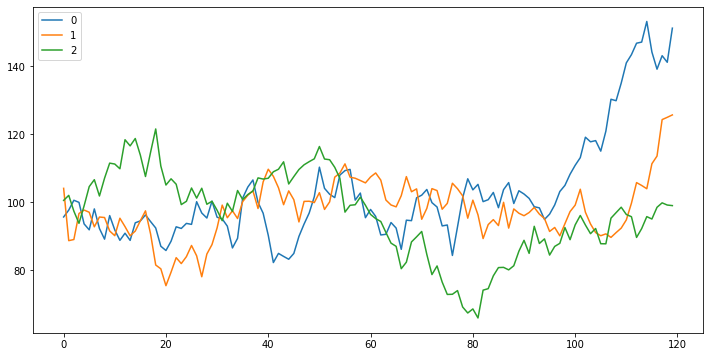

In [48]:
p.plot(figsize=(12,6))
plt.show()

### Generating 1000 scenarios

In [61]:
p = gbm(n_years=10, n_scenarios=1000)

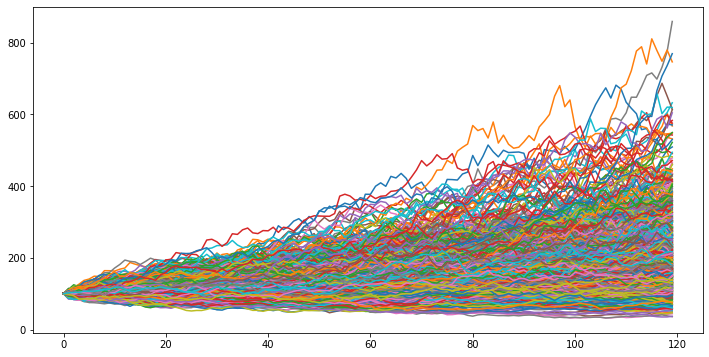

In [63]:
p.plot(figsize=(12,6), legend=False)
plt.show()

## More efficient way of generating GBM
- gbm1 is faster than gbm0

In [13]:
def gbm0(n_years=10, n_scenarios=1000, mu=0.07, sigma=0.15, steps_per_year=12, s_0=100.0):
    """
    Evolution of a Stock Price using a Geometric Brownian Motion Model
    """
    dt = 1/steps_per_year
    n_steps = int(n_years * steps_per_year)
    xi = np.random.normal(size=(n_steps, n_scenarios))
    rets = mu * dt + sigma * np.sqrt(dt) * xi
    rets = pd.DataFrame(rets)
    
    prices = s_0 * (1+rets).cumprod()
    return prices

def gbm1(n_years=10, n_scenarios=1000, mu=0.07, sigma=0.15, steps_per_year=12, s_0=100.0):
    """
    Evolution of a Stock Price using a Geometric Brownian Motion Model
    """
    dt = 1/steps_per_year
    n_steps = int(n_years * steps_per_year)
    rets_plus_1 = np.random.normal(loc=(1+mu*dt), scale=sigma*np.sqrt(dt), size=(n_steps, n_scenarios))
    
    prices = s_0 * pd.DataFrame(rets_plus_1).cumprod()
    return prices

In [16]:
%timeit gbm0(n_years=5, n_scenarios=1000)

2.85 ms ± 18.3 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [17]:
%timeit gbm1(n_years=5, n_scenarios=1000)

2.63 ms ± 22.7 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


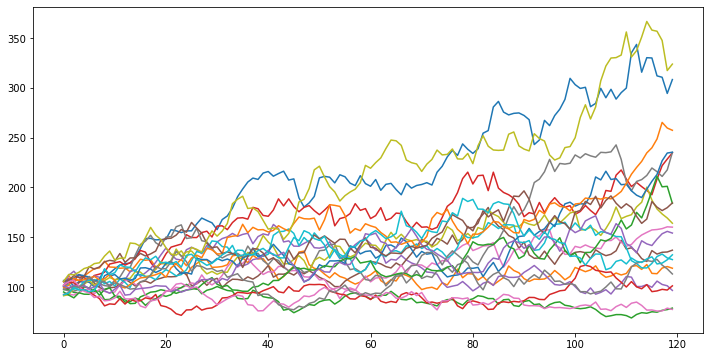

In [51]:
gbm1(n_years=10, n_scenarios=20).plot(legend=False, figsize=(12,6))
plt.show()

## Setting no shock to the first record in each scenario
- all scenarios starts from s_0

In [57]:
def gbm(n_years=10, n_scenarios=1000, mu=0.07, sigma=0.15, steps_per_year=12, s_0=100.0):
    """
    Evolution of a Stock Price using a Geometric Brownian Motion Model
    """
    dt = 1/steps_per_year
    n_steps = int(n_years * steps_per_year)
    rets_plus_1 = np.random.normal(loc=(1+mu*dt), scale=sigma*np.sqrt(dt), size=(n_steps, n_scenarios))
    rets_plus_1[0] = 1
    
    prices = s_0 * pd.DataFrame(rets_plus_1).cumprod()
    return prices

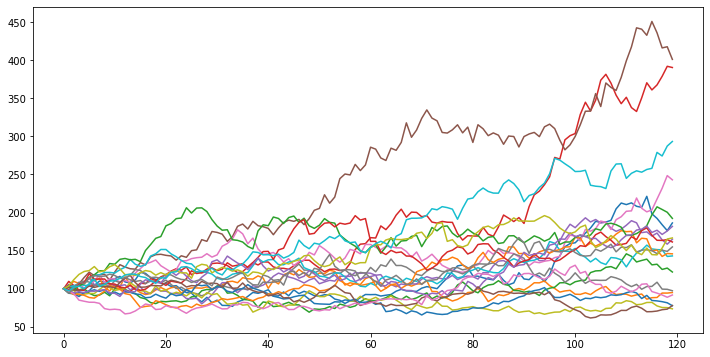

In [58]:
gbm(n_years=10, n_scenarios=20).plot(legend=False, figsize=(12,6))
plt.show()

In [59]:
gbm(n_scenarios=10).head()

,0,1,2,3,4,5,6,7,8,9
0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
1,106.781594,105.270157,104.526921,93.715233,90.725254,100.713582,101.728416,98.844512,98.208402,92.409986
2,101.383786,101.562872,107.075937,92.542694,89.547691,105.985116,110.033604,103.793053,96.230109,95.387323
3,103.608738,108.012680,114.178559,91.321241,92.728804,110.630507,107.462261,106.472373,105.864006,93.914082
4,102.189209,113.528730,108.681168,91.218483,89.245915,112.900233,113.355826,107.519390,99.420371,94.396813
